<h1><center>
    ECE 438 - Laboratory 7a<br/>
    Discrete-Time Random Process (Week 1)<br/>
    <small>Last updated on March 1, 2022</small><br/>
    <br/>
    Date:3/9<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [Ruixiang Wang]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of random variables and linear transformations (35 pts)**: *Plots, sample means and variances of $X$ and $Y$, derivation of mean and variance of $Y$, transformation and pdf of $Y$, Python code, questions*||||
|**Understanding of CDF estimation (20 pts)**: *Python code and plots*||||
|**Understanding of generating samples from a given distribution (20 pts)**: *Derivation of transformation, Python code, plots*||||
|**Understanding of PDF estimation (25 pts)**: *Plots, questions*||||

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. Use the Python function [`np.random.normal(loc=0, scale=1, size=1000)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to generate $1000$ samples of $X$, denoted as $X_1,X_2,\dots,X_{1000}$. We will assume our generated samples are *i.i.d.*.**

**Note:** `loc` is the mean (“centre”) of the distribution, while `scale` is the **standard deviation** (spread or “width”) of the distribution.

In [3]:
X = np.random.normal(loc=0, scale=1, size=1000)


**2. Plot them using the function ```plt.plot()```.**

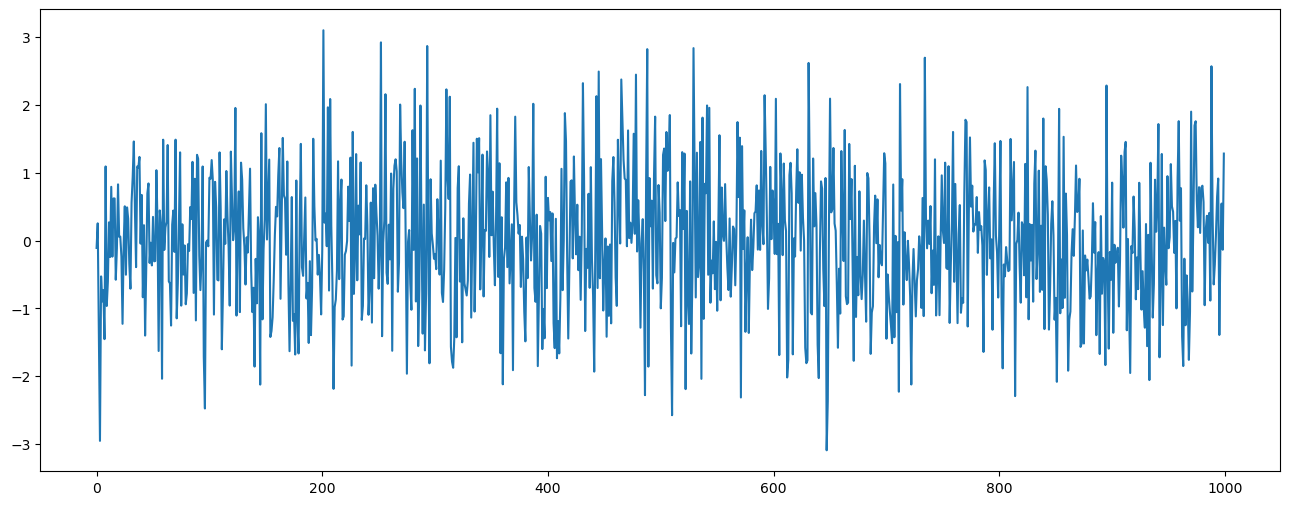

In [4]:
plt.plot(X)


**3. Write Python functions to compute the sample mean and sample variance of equations (6) and (7) without using the predefined `mean()`, `variance()`, `np.mean()` and `np.var()` functions.**

In [10]:
def get_sample_mean(X):
    """
    Parameters
    ---
    X: the samples of the random variable
    
    Returns
    ---
    mean_X: the sample mean of the random variable
    """
    mean_X = 0
    for i in range(len(X)):
        mean_X += X[i]
        
    mean_X /= len(X)
    return mean_X

In [11]:
def get_sample_var(X):
    """
    Parameters
    ---
    X: the samples of the random variable
    
    Returns:
    ---
    var_X: the sample variance of the random variable
    """
    var_X = 0
    mean_X = get_sample_mean(X)
    for i in range(len(X)):
        var_X += (X[i] - mean_X)**2
    
    var_X /= (len(X) - 1)
    return var_X

**4. Use these functions to compute the sample mean and sample variance of the samples you just generated.**

**Hint:** the following functions may be useful: ```np.sum()```and ```np.square```

In [17]:
mean_X = get_sample_mean(X)
var_X = get_sample_var(X)
print(mean_X)
print(var_X)

-0.003378020679146177
1.0106247274107099


<h3 style="color:red;"><left>Exercise 2.2</left></h3>

**1. Using the linearity property of expectation, find the mean $\mu_Y$ and variance $\sigma_Y^2$ of $Y$ in terms of $a,b,\mu_X$ and $\sigma_X^2$. Show your derivation in detail.**

**Hint:** First find the mean, then substitute the result when finding the variance.

𝜇𝑌 = a*𝜇𝑋 + b <br/>
𝜎^2𝑌 = a^2*𝜎^2𝑋

**2. Consider a linear transformation of a Gaussian random variable $X$ with mean $0$ and variance $1$. Calculate the constants $a$ and $b$ which make the mean and the variance of $Y$ $3$ and $9$, respectively.**

3 = b <br/>
+-3 = a

**3. Use equation (5) to find the probability density function (PDF) for $Y$.**

fY(y) = exp(-(y-3)^2/18)/sqrt(18pi)

**4. Generate $1000$ samples of $X$, and then calculate $1000$ samples of $Y$ by applying the linear transformation in equation (10), using the $a$ and $b$ that you just determined.**

In [69]:
X = np.random.normal(loc=0, scale=1, size=1000)
a = -3
b = 3
Y = a*X + b

**5. Plot the resulting samples of $Y$.**

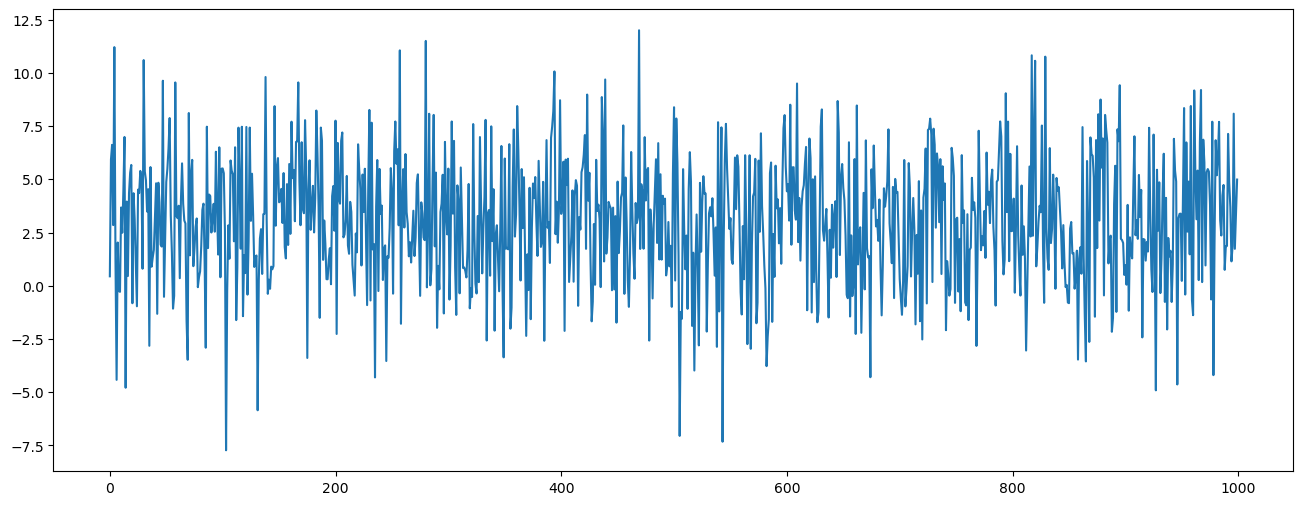

In [70]:
plt.plot(Y)

**6. Use your functions to calculate the sample mean and sample variance of the samples of $Y$.**

In [71]:
mean_Y = get_sample_mean(Y)
var_Y = get_sample_var(Y)
print(mean_Y)
print(var_Y)


3.02268540329822
8.939229651364979


<h3 style="color:red;"><left>Exercise 3.1</left></h3>

**1. Write a function to compute the empirical CDF $\hat{F}_X(t)$ from the sample vector $X$ at the points specified in the vector $t$.**

**Hint:** The expression ```np.sum(X <= s)``` will return the number of elements in the vector ```X``` which are less than or equal to ```s```.**

In [83]:
def empcdf(X,t):
    """
    Parameter
    ---
    X: the samples of the random variable
    t: the samples of time
    
    Return
    ---
    F: the empirical CDF
    """
    N = len(X)
    F = [0]*len(t)
    i = 0
    for s in t:
        F[i] = np.sum(X <= s)/N
        i += 1
        
    return F

**2. For $N=20$ and $N=200$,**
  * **Generate a sample of $\text{Uniform}[0, 1]$ random variables using the function `X = np.random.uniform(0, 1, N)`.**
  * **Plot the CDF estimate in the range ```t = np.linspace(-1, 2, 2000)```, and superimpose the true distribution for a $\text{Uniform}[0, 1]$ random variable.**
  
**Note:** make sure the figures for $N=20$ and $N=200$ are plotted in separate cells.

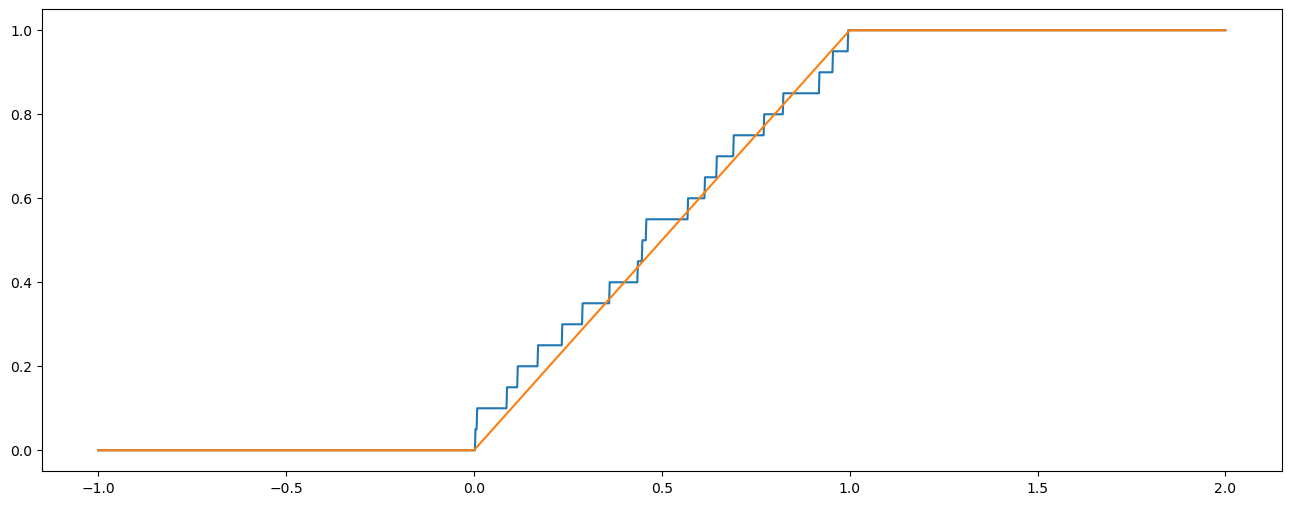

In [106]:
# N = 20
X_20 = np.random.uniform(0,1,20)
t = np.linspace(-1,2,2000)
n = [0]*len(t)
i = 0
for s in t:
    if s<0:
        n[i] = 0
        i+=1
    elif s<1:
        n[i] = s
        i+=1
    else:
        n[i] = 1
        i+=1


    
F_20 = empcdf(X_20, t)
plt.plot(t,F_20)
plt.plot(t,n)

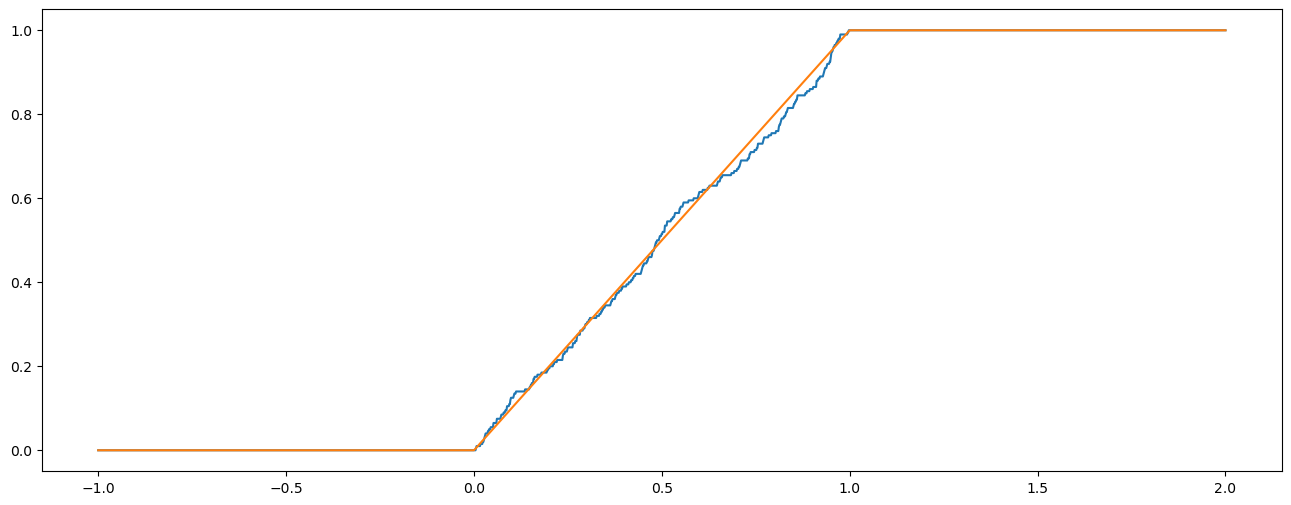

In [108]:
# N = 200
X_200 = np.random.uniform(0,1,200)
t = np.linspace(-1,2,2000)
n = [0]*len(t)
i = 0
for s in t:
    if s<0:
        n[i] = 0
        i+=1
    elif s<1:
        n[i] = s
        i+=1
    else:
        n[i] = 1
        i+=1

F_200 = empcdf(X_200, t)
plt.plot(t,F_200)
plt.plot(t,n)

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Derive the required transformation.**

Y = (1-exp(-3X))
X = ln(1-Y)/-3

**2. Generate samples of X when $N=20$ and $N=200$.**

In [87]:
x = np.linspace(-1,2,2000)



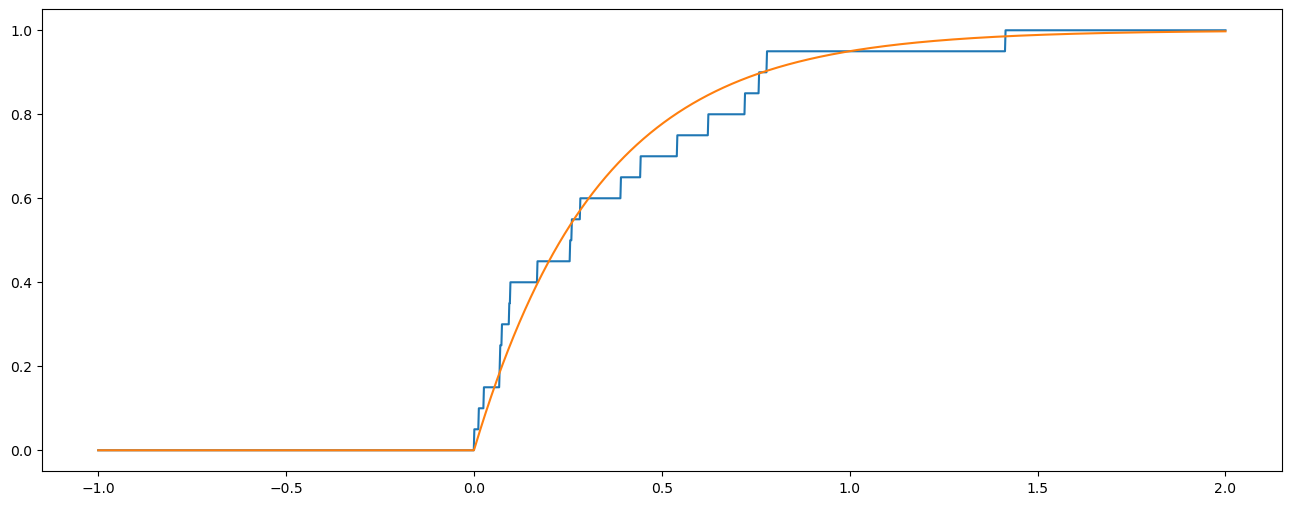

In [113]:
Y = np.random.uniform(0,1,20)
X1 = empcdf(np.log(1-Y)/-3,x)

n = [0]*len(x)
i = 0
for s in x:
    if s<0:
        n[i] = 0
        i+=1
    else:
        n[i] = (1-np.exp(-3*s))
        i+=1

plt.plot(x,X1)
plt.plot(t,n)

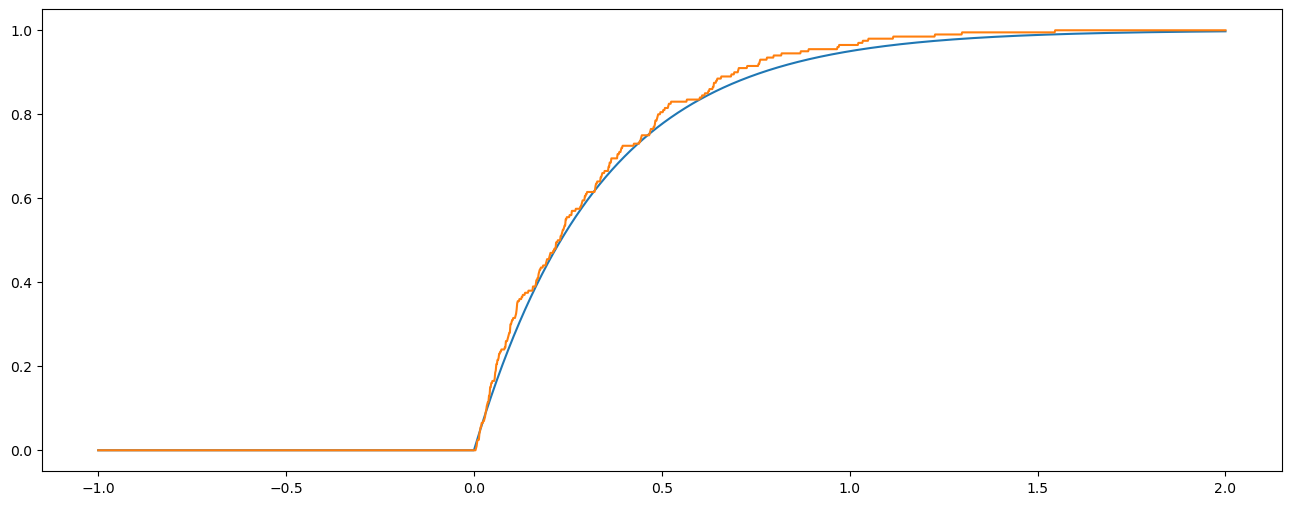

In [114]:
Y = np.random.uniform(0,1,200)
X2 = empcdf(np.log(1-Y)/-3,x)
n = [0]*len(x)
i = 0
for s in x:
    if s<0:
        n[i] = 0
        i+=1
    else:
        n[i] = (1-np.exp(-3*s))
        i+=1

plt.plot(t,n)
plt.plot(x,X2)

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Plot $F_X(x)$ for $x\in[0, 1]$.**

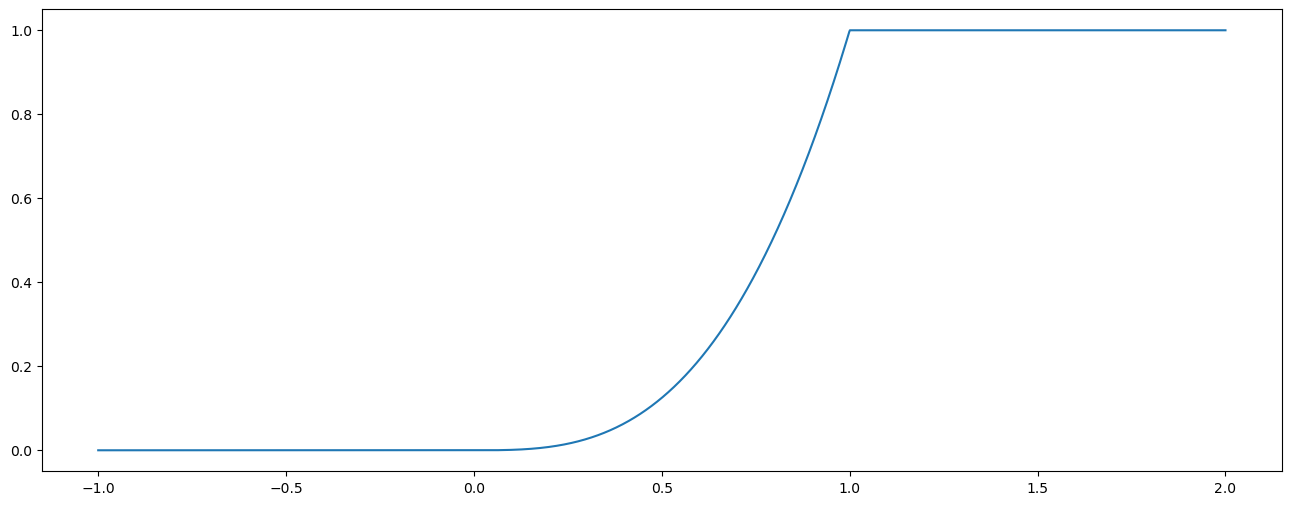

In [117]:
x = np.linspace(-1,2,2000)
n = [0]*len(x)
i = 0
for s in x:
    if s<0:
        n[i] = 0
        i+=1
    elif s<=1:
        n[i] = s**3
        i+=1
    else:
        n[i] = 1
        i+=1
        
plt.plot(x,n)

**2. Analytically calculate the probability density $f_X(x)$, and plot it for $x \in [0, 1]$.**

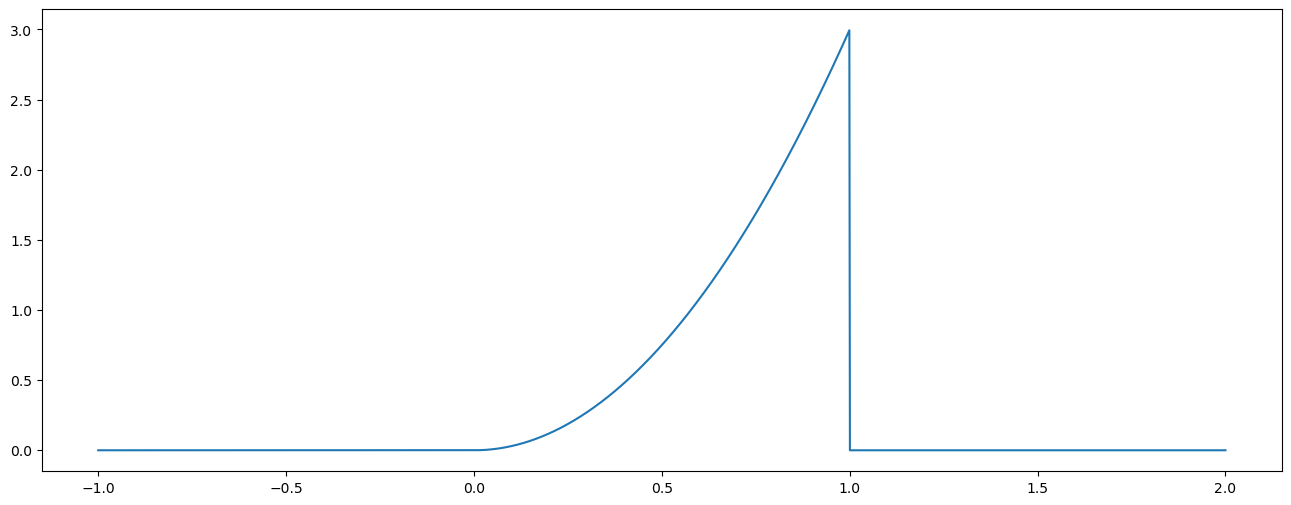

In [4]:
x = np.linspace(-1,2,2000)
n = [0]*len(x)
i = 0
for s in x:
    if s<0:
        n[i] = 0
        i+=1
    elif s<=1:
        n[i] = 3*s**2
        i+=1
    else:
        n[i] = 0
        i+=1
        
plt.plot(x,n)


**3. Using $L = 20$, $x_0 = 0$ and $x_L = 1$, write code to compute $\tilde{f}(k)$, the probability of $X$ falling into *$bin(k)$*. Plot $\tilde{f}(k)$ for $k=1,\dots,L$ using the ```plt.stem()``` function.**

**Hint:** Use the fact that $\tilde{f}(k) = F_X(x_k) − F_X(x_{k−1})$.

<StemContainer object of 3 artists>

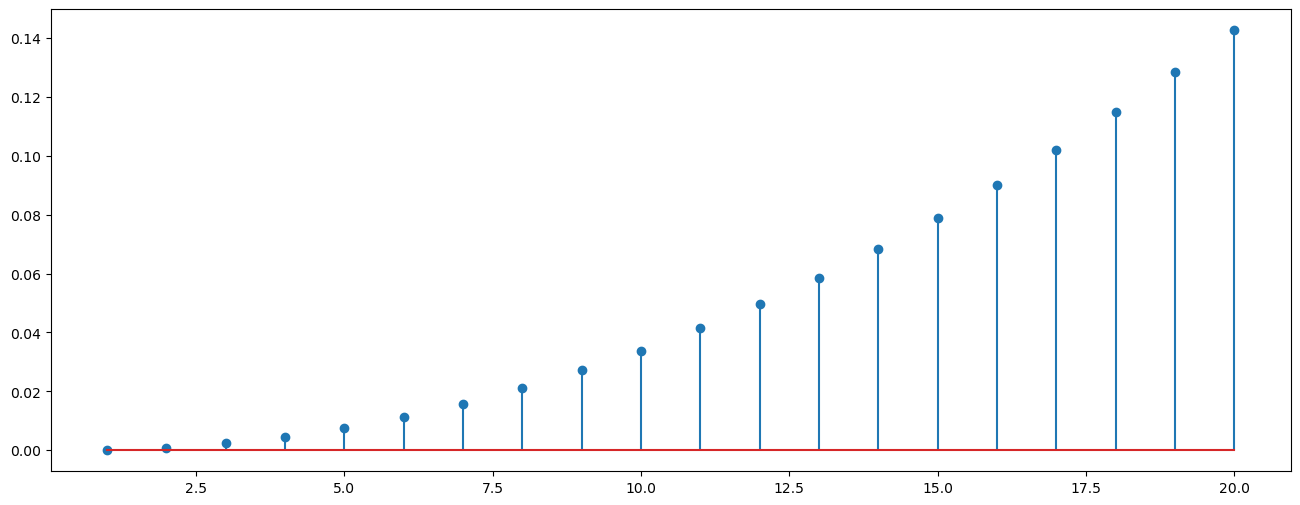

In [24]:
L = 20
delta = 1 / L
k = np.linspace(0, L, 21)

f_telda = [0]*len(k)
        
        
x = np.linspace(0,1,21)
n = [0]*len(x)

i = 0
for s in x:
    if s<0:
        n[i] = 0
        i+=1
    elif s<=1:
        n[i] = s**3
        i+=1
    else:
        n[i] = 1
        i+=1        
ctr = 0
for s in k:
    f_telda[ctr] = n[ctr] - n[ctr-1]
    ctr+=1

k_1 = k[1:]    
f_telda_1 = f_telda[1:]

plt.stem(k_1,f_telda_1)

**4. Show (mathematically) how $f_X(x)$ and $\tilde{f}(k)$ are related.**

f_telda is the probability between xk and xk-1 in distribution function, thus f_telda is the f scaled down by delta

**5. Generate $1000$ samples of a random variable $U$ that is uniformly distributed between $0$ and 1 (using the ```np.random.uniform(0, 1, 1000)```). Then form the random vector $X$ by computing $X=U^{1/3}$.**

In [25]:
U = np.random.uniform(0, 1, 1000)
X = U**(1/3)

**6. Use the Python function [```np.histogram()```](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) to plot a *normalized* histogram for your samples of $X$, using $20$ bins uniformly spaced on the interval $[0, 1]$. Use the ```plt.stem()``` command to plot the normalized histogram $H(k)/N$.**

**Hint:** Use the Python command ```H, _ = np.histogram(X, bins=20, range=(0, 1))``` to obtain the normalized histogram. The underscore `_` means that whatever the second argument the function returns, I don't care and don't bother assigning it to a variable.

<StemContainer object of 3 artists>

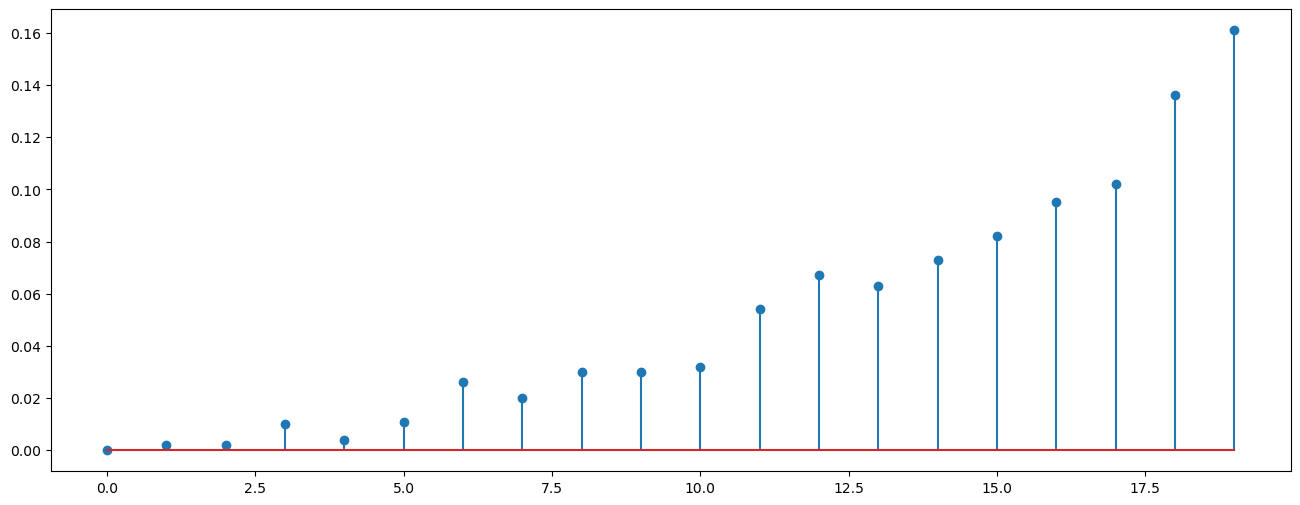

In [26]:
H, _ = np.histogram(X, bins=20, range=(0,1))
plt.stem(H/len(X))

**7. How do these plots ($H(k)/N$ and $\tilde{f}(k)$) compare?**

Very similar to each other

**8. Discuss the tradeoffs (advantages and the disadvantages) between selecting a very large or very small bin-width.**

A smallar bin-width means a more accurate representation of f, but f_telda is scaled down even more. A very large bin-width